In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'latin-1')

C:\Users\Nigama\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.shape

(181691, 135)

In [6]:
df.rename(columns = {'iyear': 'Year', 'imonth': 'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt': 'AttackType','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt': 'Weapon_type','motive':'Motive'},inplace = True)

In [7]:
df1 = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','target1','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
df1.rename(columns = {'target1':'Target'},inplace =True)

C:\Users\Nigama\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
df1.columns

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [10]:
df1.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
df1.shape

(181691, 18)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [13]:
df1.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [14]:
df1.isnull().sum()/181691

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
state          0.002317
Region         0.000000
city           0.002389
latitude       0.025076
longitude      0.025081
AttackType     0.000000
Killed         0.056761
Wounded        0.089773
Target         0.003500
Summary        0.363964
Group          0.000000
Target_type    0.000000
Weapon_type    0.000000
Motive         0.721720
dtype: float64

In [15]:
#getting unique values
for i in df1.columns:
    print(i,df1[i].nunique())

Year 47
Month 13
Day 32
Country 205
state 2855
Region 12
city 36674
latitude 48322
longitude 48039
AttackType 9
Killed 205
Wounded 238
Target 86006
Summary 112492
Group 3537
Target_type 22
Weapon_type 12
Motive 14490


In [16]:
df1.shape

(181691, 18)

In [17]:
df2 = df1.drop('Motive',axis = 1)

In [18]:
#Univariete Analysis

In [19]:
#Attack Types

In [20]:
df2['AttackType'].value_counts(normalize = True)*100

Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: AttackType, dtype: float64

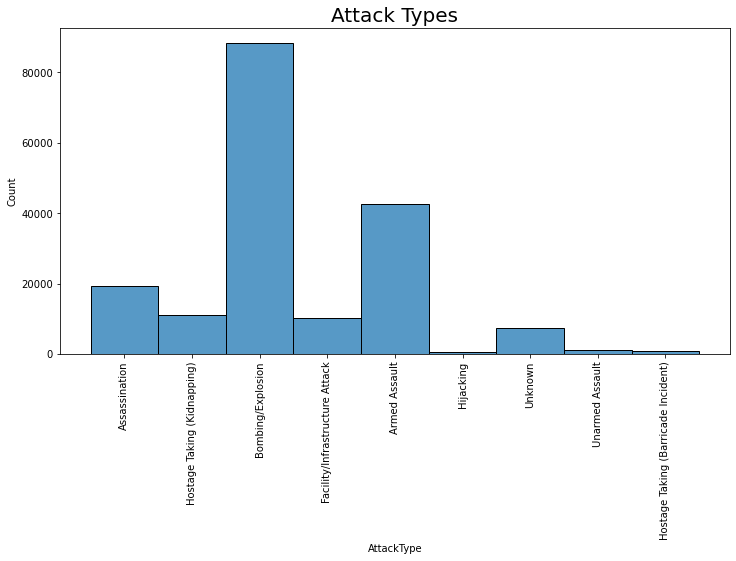

In [21]:
plt.figure(figsize = (12,6))
sns.histplot(df2.AttackType)
plt.title('Attack Types', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [22]:
#Affected Countries

In [23]:
df2.Country.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


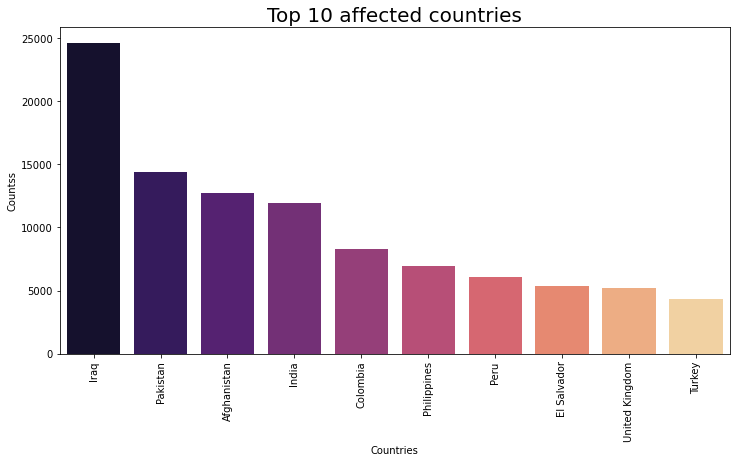

In [24]:
plt.figure(figsize = (12,6))
sns.barplot(df2.Country.value_counts()[:10].index,df2.Country.value_counts()[:10].values,palette = 'magma')
plt.title('Top 10 affected countries', fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.show()

In [25]:
#Target_type

In [26]:
df2.Target_type.value_counts(normalize = True).head(10)*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


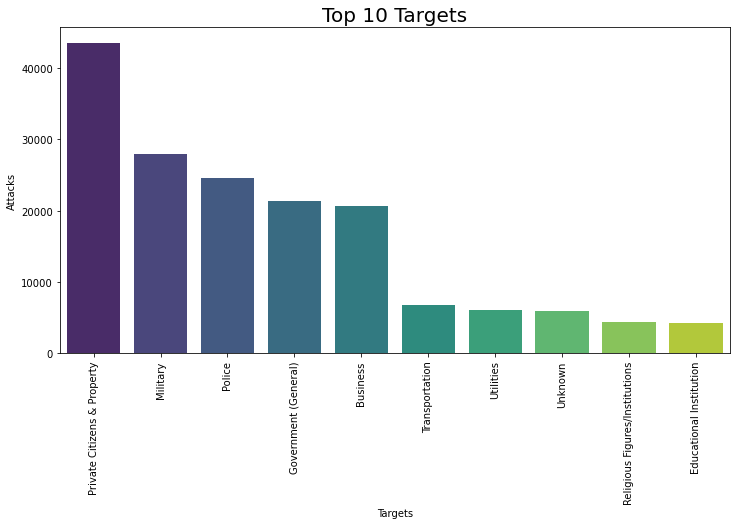

In [30]:
plt.figure(figsize = (12,6))
sns.barplot(df2['Target_type'].value_counts().head(10).index,df2.Target_type.value_counts().head(10).values,palette = 'viridis')
plt.title('Top 10 Targets', fontsize = 20)
plt.xlabel('Targets')
plt.ylabel('Attacks')
plt.xticks(rotation = 90)
plt.show()

In [33]:
df2.Region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


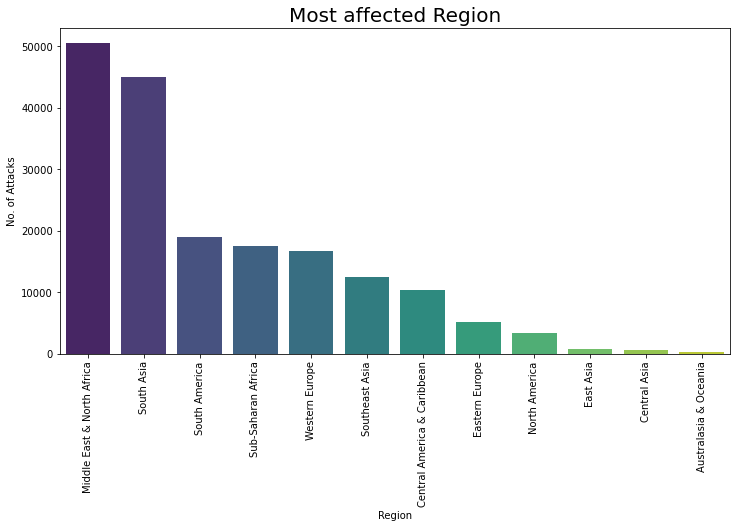

In [34]:
#Most attacked region
plt.figure(figsize = (12,6))
sns.barplot(df2.Region.value_counts().index,df2.Region.value_counts().values,palette = 'viridis')
plt.title('Most affected Region', fontsize = 20)
plt.xlabel('Region')
plt.ylabel('No. of Attacks')
plt.xticks(rotation = 90)
plt.show()

In [37]:
df2.state.value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


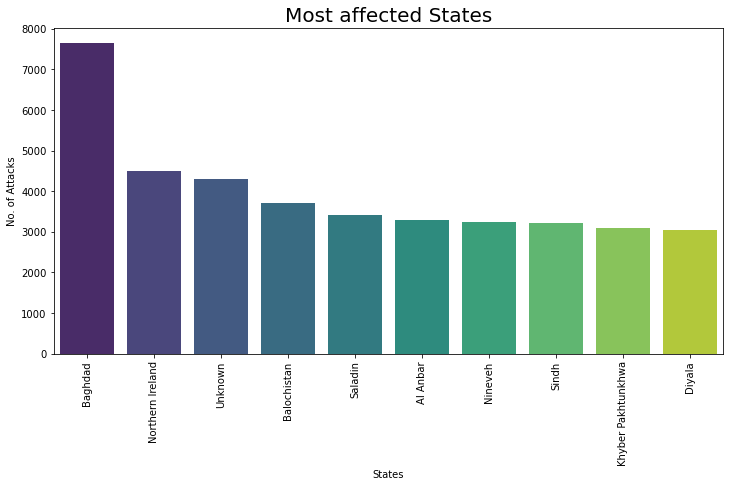

In [38]:
plt.figure(figsize = (12,6))
sns.barplot(df2.state.value_counts().head(10).index,df2.state.value_counts().head(10).values,palette = 'viridis')
plt.title('Most affected States', fontsize = 20)
plt.xlabel('States')
plt.ylabel('No. of Attacks')
plt.xticks(rotation = 90)
plt.show()

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [46]:
df2.Weapon_type.value_counts(normalize = True)*100

Explosives                                                                     50.869883
Firearms                                                                       32.210731
Unknown                                                                         8.342185
Incendiary                                                                      6.128537
Melee                                                                           2.011657
Chemical                                                                        0.176674
Sabotage Equipment                                                              0.077604
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     0.074852
Other                                                                           0.062744
Biological                                                                      0.019263
Fake Weapons                                                                    0.018163
Radiological         

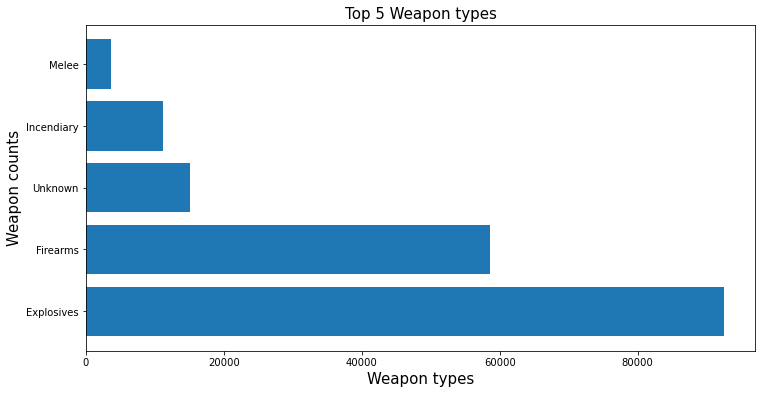

In [75]:
plt.figure(figsize = [12,6])
plt.barh(df2.Weapon_type.value_counts().head(5).index,df2.Weapon_type.value_counts().head(5).values)
plt.title('Top 5 Weapon types', fontsize = 15)
plt.xlabel('Weapon types', fontsize = 15)
plt.ylabel('Weapon counts', fontsize = 15)
plt.show()

In [51]:
X = df2.Year.unique()
y = df2.Year.value_counts().sort_index()

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


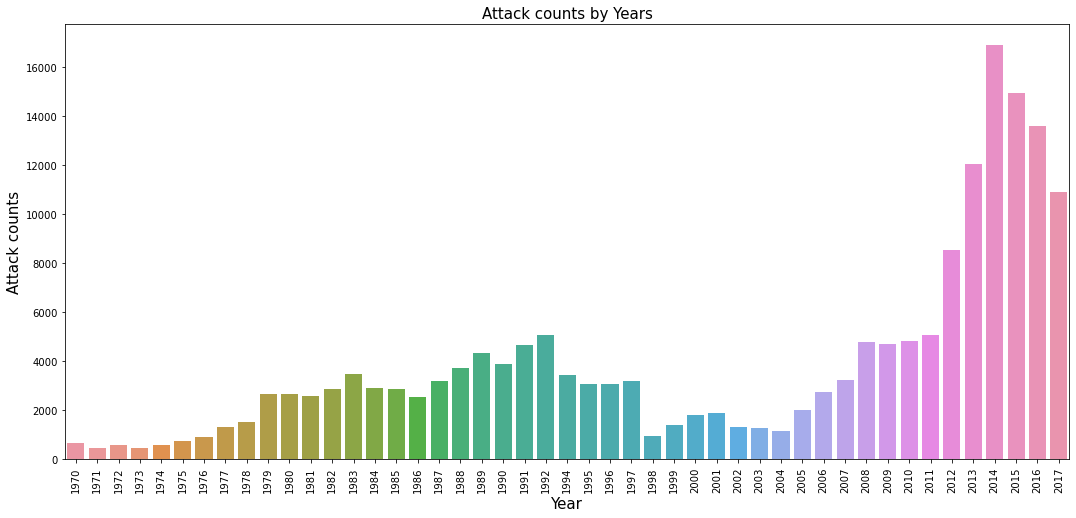

In [58]:
plt.figure(figsize = [18,8])
sns.barplot(X,y)
plt.title('Attack counts by Years', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Attack counts', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [89]:
df_2014 = df2[df2.Year == 2014]

In [90]:
df_2014.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
125335,2014,1,1,Colombia,Norte de Santander,South America,Convencion,8.868790,-73.194094,Bombing/Explosion,0.0,0.0,Crude Oil Holding Pools,01/01/2014: Assailants detonated an explosive ...,National Liberation Army of Colombia (ELN),Utilities,Explosives
125336,2014,1,1,Somalia,Banaadir,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Bombing/Explosion,4.0,20.0,Hotel,01/01/2014: A suicide bomber detonated an expl...,Al-Shabaab,Business,Explosives
125337,2014,1,1,Pakistan,Balochistan,South Asia,Quetta,30.200819,66.994354,Bombing/Explosion,3.0,31.0,Shia Pilgrims,01/01/2014: A suicide bomber crashed an explos...,Jaish-e-Islam,Private Citizens & Property,Explosives
125338,2014,1,1,Pakistan,Balochistan,South Asia,Dera Bugti,29.034412,69.158661,Bombing/Explosion,0.0,0.0,Unknown,01/01/2014: A land mine was found and defused ...,Unknown,Unknown,Explosives
125339,2014,1,1,Somalia,Middle Juba,Sub-Saharan Africa,Buale,1.097128,42.598368,Hostage Taking (Kidnapping),NaN,NaN,Aid Workers,01/01/2014: Assailants abducted ten individual...,Al-Shabaab,NGO,Unknown


C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


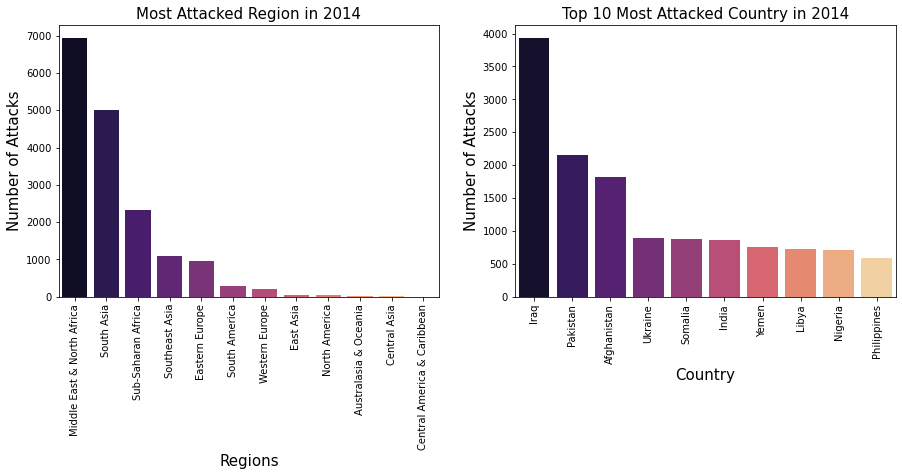

In [92]:
# Regions that were attacked most in 2014
plt.subplot(1,2,1)
sns.barplot(df_2014['Region'].value_counts().index,df_2014['Region'].value_counts().values,palette='magma')
plt.title('Most Attacked Region in 2014',fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)

# top 10 countries that were attacked most in 2014
plt.subplot(1,2,2)
sns.barplot(df_2014['Country'].value_counts().head(10).index,df_2014['Country'].value_counts().head(10).values,palette='magma')
plt.title('Top 10 Most Attacked Country in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)
plt.show()

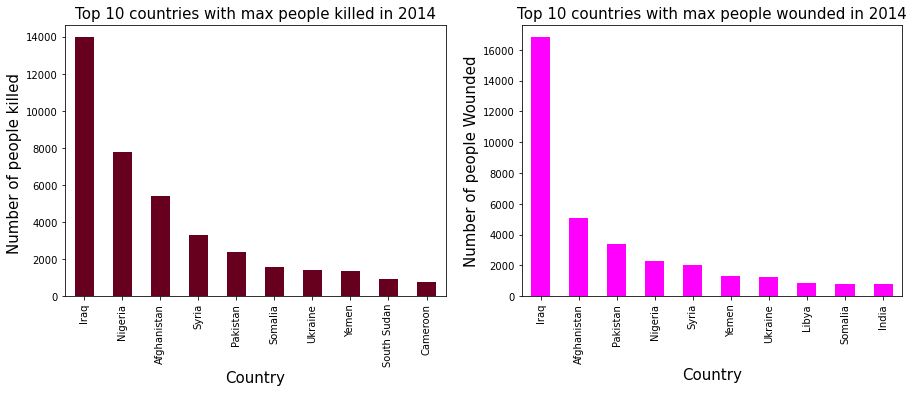

In [93]:
plt.subplot(1,2,1)
df_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='RdBu')
plt.title('Top 10 countries with max people killed in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people killed ',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
df_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='spring')
plt.title('Top 10 countries with max people wounded in 2014',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

In [67]:
#No of killed by Years
X1 = df2.groupby(['Year'])['Killed'].sum().index
y1 = df2.groupby(['Year'])['Killed'].sum().values

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


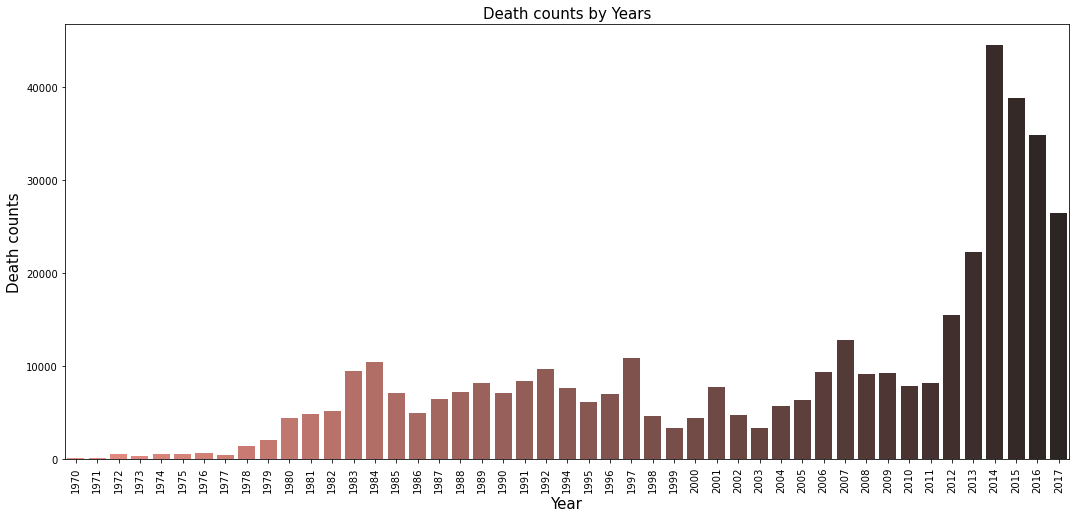

In [70]:
plt.figure(figsize = [18,8])
sns.barplot(X1,y1,palette = 'dark:salmon_r')
plt.title('Death counts by Years', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Death counts', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [71]:
# Frequency of attcks by Region

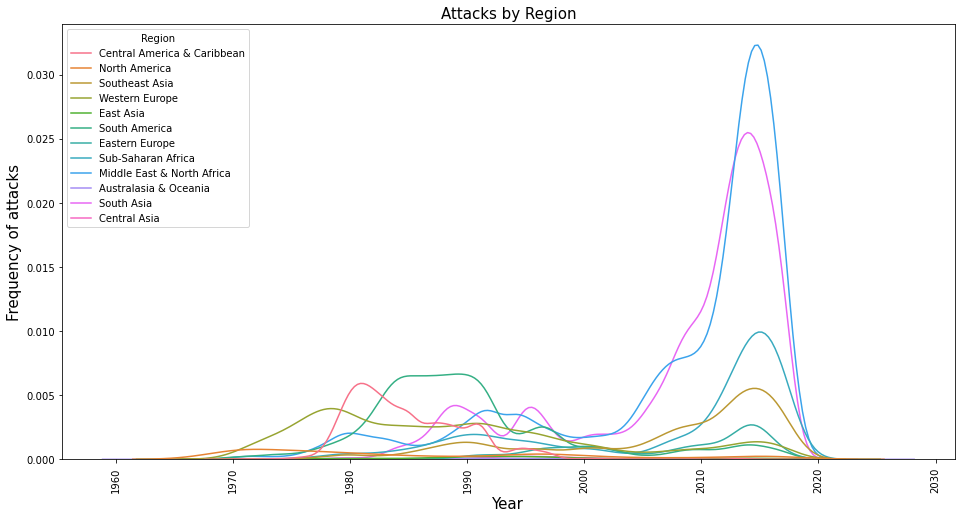

In [73]:
plt.figure(figsize = [16,8])
sns.kdeplot(df2.Year,hue = df2.Region)
plt.title('Attacks by Region', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency of attacks', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


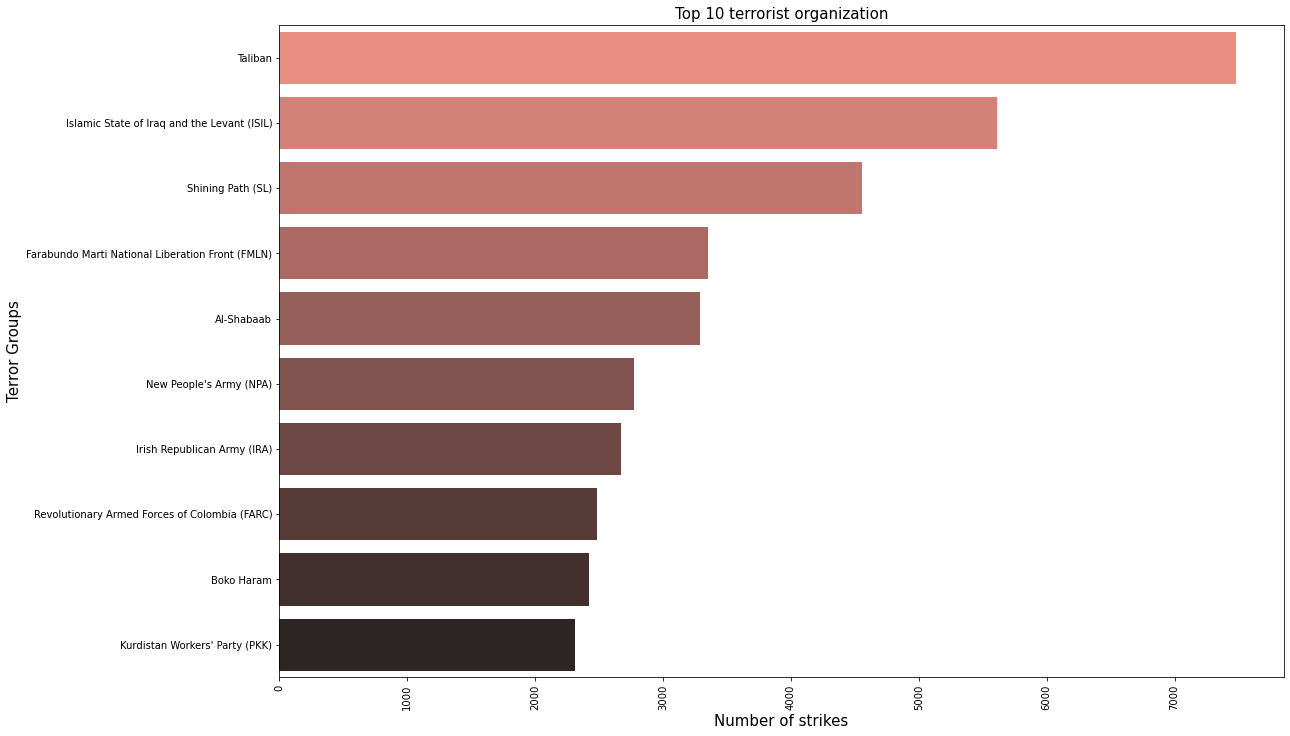

In [79]:
# Top 10 Terrorist Organization
X2 = df2.Group.value_counts()[1:11].values
y2 = df2.Group.value_counts()[1:11].index
plt.figure(figsize = [18,12])
sns.barplot(X2,y2,palette = 'dark:salmon_r')
plt.title('Top 10 terrorist organization', fontsize = 15)
plt.xlabel('Number of strikes', fontsize = 15)
plt.ylabel('Terror Groups', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [80]:
# Insights about Taliban:
df_talib =df2[df2.Group == 'Taliban' ]

In [81]:
df_talib.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
59040,1995,4,20,Afghanistan,Unknown,South Asia,Unknown,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,Federal Investigation Agency,NaN,Taliban,Police,Unknown
60014,1995,8,3,Afghanistan,Kandahar,South Asia,Kandahar,31.631083,65.742226,Hijacking,0.0,0.0,Russian Il-76 Cargo Aircraft,NaN,Taliban,Airports & Aircraft,Explosives
60462,1995,9,21,Afghanistan,Kandahar,South Asia,Kandahar,31.631083,65.742226,Hijacking,0.0,0.0,Boeing 727,NaN,Taliban,Airports & Aircraft,Explosives
60786,1995,10,25,Afghanistan,Kabul,South Asia,Kabul,34.516895,69.147011,Bombing/Explosion,0.0,0.0,ICRC- Chartered Aircraft,NaN,Taliban,Airports & Aircraft,Explosives
71682,2001,1,7,Afghanistan,Bamyan,South Asia,Yakawlang,34.733333,66.966667,Armed Assault,150.0,NaN,Civilians living in the vicinity of Yakawlang,1/7/2001: Taliban militia regained control of ...,Taliban,Private Citizens & Property,Firearms


In [82]:
df_talib.shape

(7478, 17)

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


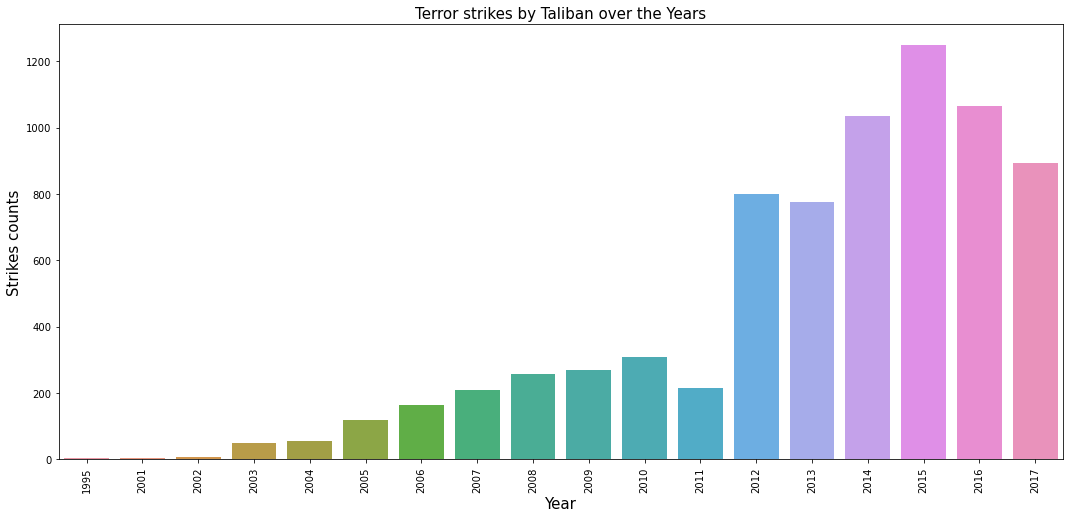

In [88]:
X_t = df_talib.Year.value_counts().index
y_t = df_talib.Year.value_counts().values
plt.figure(figsize = [18,8])
sns.barplot(X_t,y_t)
plt.title('Terror strikes by Taliban over the Years', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Strikes counts', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Nigama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


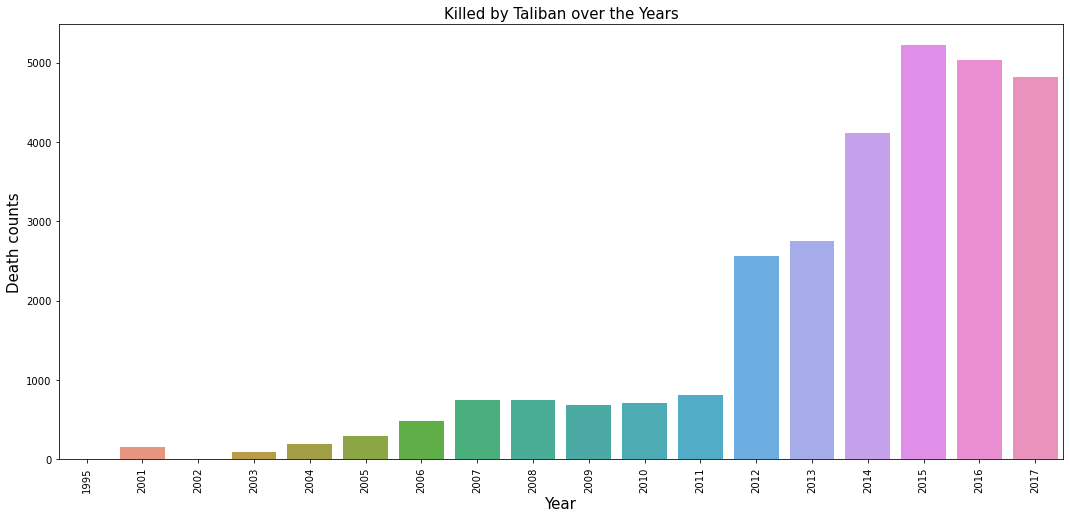

In [84]:
X_t1 = df_talib.groupby(['Year'])['Killed'].sum().index
y_t1 = df_talib.groupby(['Year'])['Killed'].sum().values
plt.figure(figsize = [18,8])
sns.barplot(X_t1,y_t1)
plt.title('Killed by Taliban over the Years', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Death counts', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Conclusion
## After performing the Exploratory Data Analysis we get the following insights from the data:

- Private Citizens and Property were attacked most followed by Military, Police, Government and so on.
- Middle East & North Africa was most affected among the top affected region. Most of the people in this region were either wounded or killed.
- Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
- The State and City that was most affected was Baghdad
- In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.
- The most common attack type was Bombing/Explosion.
- Explosives have been consistently the most popular weapon of choice for terrorists.
- Taliban became more active since 2012 and they are responsible for the most of the terror attacks

# Recommendation

- Since Private Citizens and Property are being targeted consistently so stronger security and surveillance should be provided, especially in the dense populated regions.
- More surveillance is required especially in the Middle East & North African Regions.
- Strict border policy should be implemented to prevent the movement of explosives between the regions.